Este conjunto de datos explora la relación entre los patrones de sueño y la salud en general. Incluye información detallada sobre los hábitos de sueño individuales, las métricas de salud y los factores del estilo de vida, lo que permite analizar cómo la calidad y la duración del sueño afectan el bienestar físico y mental. El conjunto de datos está diseñado para respaldar la investigación sobre la higiene del sueño, las condiciones de salud crónicas, la salud mental y las influencias del estilo de vida en el sueño.

# **Analisis con Pandas y Kaggle (Core)**

**Preparación del Entorno**
Asegúrate de tener instalado Pandas en tu entorno de trabajo.
Descarga el archivo dataset.csv desde Kaggle. Elige un dataset que te interese y que no incluya visualización de datos. Algunas sugerencias pueden ser datasets relacionados con ventas, compras, productos, etc.

In [32]:
from google.colab import drive

drive.mount('/content/drive')

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


In [33]:
import pandas as pd

**Cargar los Datos**
Carga el archivo CSV en un DataFrame de Pandas.
Muestra las primeras 10 filas del DataFrame para confirmar que los datos se han cargado correctamente.

In [34]:
# Importamos una bbdd en formato csv y lo guardamos en una variable.
path = "/content/drive/MyDrive/Bootcamp-ML/Cores/core 8/Sleep_health_and_lifestyle_dataset.csv"
df = pd.read_csv(path)
df2= df.copy()

In [35]:
df2.head(10)

,Person ID,Gender,Age,Occupation,Sleep Duration,Quality of Sleep,Physical Activity Level,Stress Level,BMI Category,Blood Pressure,Heart Rate,Daily Steps,Sleep Disorder
0,1,Male,27,Software Engineer,6.1,6,42,6,Overweight,126/83,77,4200,NaN
1,2,Male,28,Doctor,6.2,6,60,8,Normal,125/80,75,10000,NaN
2,3,Male,28,Doctor,6.2,6,60,8,Normal,125/80,75,10000,NaN
3,4,Male,28,Sales Representative,5.9,4,30,8,Obese,140/90,85,3000,Sleep Apnea
4,5,Male,28,Sales Representative,5.9,4,30,8,Obese,140/90,85,3000,Sleep Apnea
5,6,Male,28,Software Engineer,5.9,4,30,8,Obese,140/90,85,3000,Insomnia
6,7,Male,29,Teacher,6.3,6,40,7,Obese,140/90,82,3500,Insomnia
7,8,Male,29,Doctor,7.8,7,75,6,Normal,120/80,70,8000,NaN
8,9,Male,29,Doctor,7.8,7,75,6,Normal,120/80,70,8000,NaN
9,10,Male,29,Doctor,7.8,7,75,6,Normal,120/80,70,8000,NaN


| **Columna**                | **Tipo de Dato** | **Descripción** |
|---------------------------|------------------|------------------|
| `person_id`               | Numérica (int)   | Identificador único para cada individuo. No aporta valor predictivo. |
| `gender`                  | Categórica       | Género del participante: `Male` o `Female`. Puede influir en patrones de sueño y salud. |
| `age`                     | Numérica (int)   | Edad en años. Variable continua relacionada con el sueño y la salud. |
| `occupation`              | Categórica       | Ocupación o profesión. Puede impactar hábitos de sueño, estrés y actividad física. |
| `sleep_duration`          | Numérica (float) | Horas promedio de sueño por noche. Variable clave del análisis. |
| `quality_of_sleep`        | Numérica (int)   | Calidad del sueño en escala de 1 a 10. Buen candidato para variable objetivo (*target*). |
| `physical_activity_level` | Numérica (int)   | Nivel de actividad física semanal. Puede ser escala o cantidad relativa de ejercicio. |
| `stress_level`            | Numérica (int)   | Nivel de estrés percibido (1 a 10). Alta correlación negativa con calidad del sueño. |
| `bmi_category`            | Categórica       | Clasificación del IMC: `Normal`, `Overweight`, `Obese`, `Normal Weight`. Factor relevante para trastornos del sueño. |
| `blood_pressure`          | Categórica       | Presión arterial (formato: "sistólica/diastólica"). Texto no normalizado, puede requerir limpieza. |
| `heart_rate`              | Numérica (int)   | Frecuencia cardíaca en reposo (latidos por minuto). Indicador de condición física general. |
| `daily_steps`             | Numérica (int)   | Promedio de pasos diarios. Mide nivel de actividad física. |
| `sleep_disorder`          | Categórica       | Diagnóstico de trastorno del sueño: `Insomnia`, `Sleep Apnea`, o `NaN`. Tiene muchos valores nulos. |




**Exploración Inicial de los Datos**
Muestra las últimas 5 filas del DataFrame.
Utiliza el método info() para obtener información general sobre el DataFrame, incluyendo el número de entradas, nombres de las columnas, tipos de datos y memoria utilizada.
Genera estadísticas descriptivas del DataFrame utilizando el método describe().

In [36]:
#últimas filas
print(df2.tail(5))

     Person ID  Gender  Age Occupation  Sleep Duration  Quality of Sleep  \
369        370  Female   59      Nurse             8.1                 9   
370        371  Female   59      Nurse             8.0                 9   
371        372  Female   59      Nurse             8.1                 9   
372        373  Female   59      Nurse             8.1                 9   
373        374  Female   59      Nurse             8.1                 9   

     Physical Activity Level  Stress Level BMI Category Blood Pressure  \
369                       75             3   Overweight         140/95   
370                       75             3   Overweight         140/95   
371                       75             3   Overweight         140/95   
372                       75             3   Overweight         140/95   
373                       75             3   Overweight         140/95   

     Heart Rate  Daily Steps Sleep Disorder  
369          68         7000    Sleep Apnea  
370   

In [37]:
df2.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 374 entries, 0 to 373
Data columns (total 13 columns):
 #   Column                   Non-Null Count  Dtype  
---  ------                   --------------  -----  
 0   Person ID                374 non-null    int64  
 1   Gender                   374 non-null    object 
 2   Age                      374 non-null    int64  
 3   Occupation               374 non-null    object 
 4   Sleep Duration           374 non-null    float64
 5   Quality of Sleep         374 non-null    int64  
 6   Physical Activity Level  374 non-null    int64  
 7   Stress Level             374 non-null    int64  
 8   BMI Category             374 non-null    object 
 9   Blood Pressure           374 non-null    object 
 10  Heart Rate               374 non-null    int64  
 11  Daily Steps              374 non-null    int64  
 12  Sleep Disorder           155 non-null    object 
dtypes: float64(1), int64(7), object(5)
memory usage: 38.1+ KB


In [38]:
df2.describe()

,Person ID,Age,Sleep Duration,Quality of Sleep,Physical Activity Level,Stress Level,Heart Rate,Daily Steps
count,374.000000,374.000000,374.000000,374.000000,374.000000,374.000000,374.000000,374.000000
mean,187.500000,42.184492,7.132086,7.312834,59.171123,5.385027,70.165775,6816.844920
std,108.108742,8.673133,0.795657,1.196956,20.830804,1.774526,4.135676,1617.915679
min,1.000000,27.000000,5.800000,4.000000,30.000000,3.000000,65.000000,3000.000000
25%,94.250000,35.250000,6.400000,6.000000,45.000000,4.000000,68.000000,5600.000000
50%,187.500000,43.000000,7.200000,7.000000,60.000000,5.000000,70.000000,7000.000000
75%,280.750000,50.000000,7.800000,8.000000,75.000000,7.000000,72.000000,8000.000000
max,374.000000,59.000000,8.500000,9.000000,90.000000,8.000000,86.000000,10000.000000


**Limpieza de Datos**
Identifica y maneja los datos faltantes utilizando técnicas apropiadas (relleno con valores estadísticos, interpolación, eliminación, etc.).
Corrige los tipos de datos si es necesario (por ejemplo, convertir cadenas a fechas).
Elimina duplicados si los hay.

In [39]:
# Identificar valores nulos en todo el DataFrame
print(df2.isnull().sum())
#De acuerdo a df.info() sólo la columna Sleep Disorder tiene diferencia de registros, tiene 219 nulos , cómo es un dato relacionado con salud, se eliminará la columna.
#Las demás columnas tienen registros completos

Person ID                    0
Gender                       0
Age                          0
Occupation                   0
Sleep Duration               0
Quality of Sleep             0
Physical Activity Level      0
Stress Level                 0
BMI Category                 0
Blood Pressure               0
Heart Rate                   0
Daily Steps                  0
Sleep Disorder             219
dtype: int64


In [40]:
# Cambio de nombres en columnas: Buena Práctica
df2.columns = df2.columns.str.lower().str.replace(" ", "_")
df2.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 374 entries, 0 to 373
Data columns (total 13 columns):
 #   Column                   Non-Null Count  Dtype  
---  ------                   --------------  -----  
 0   person_id                374 non-null    int64  
 1   gender                   374 non-null    object 
 2   age                      374 non-null    int64  
 3   occupation               374 non-null    object 
 4   sleep_duration           374 non-null    float64
 5   quality_of_sleep         374 non-null    int64  
 6   physical_activity_level  374 non-null    int64  
 7   stress_level             374 non-null    int64  
 8   bmi_category             374 non-null    object 
 9   blood_pressure           374 non-null    object 
 10  heart_rate               374 non-null    int64  
 11  daily_steps              374 non-null    int64  
 12  sleep_disorder           155 non-null    object 
dtypes: float64(1), int64(7), object(5)
memory usage: 38.1+ KB


In [41]:
# Revisar duplicados. --> no hay duplicados
df2.duplicated().sum()

np.int64(0)

In [42]:
print(df2.columns)

Index(['person_id', 'gender', 'age', 'occupation', 'sleep_duration',
       'quality_of_sleep', 'physical_activity_level', 'stress_level',
       'bmi_category', 'blood_pressure', 'heart_rate', 'daily_steps',
       'sleep_disorder'],
      dtype='object')


In [43]:
df2['sleep_disorder'].value_counts()

,count
sleep_disorder,
Sleep Apnea,78
Insomnia,77


In [60]:
df2.head()


,person_id,gender,age,occupation,sleep_duration,quality_of_sleep,physical_activity_level,stress_level,bmi_category,blood_pressure,heart_rate,daily_steps,sleep_disorder,sleep_category,actividad_fisica
0,1,Male,27,Software Engineer,6.1,6,42,6,Overweight,126/83,77,4200,Sleep Apnea,corto,alta
1,2,Male,28,Doctor,6.2,6,60,8,Normal,125/80,75,10000,Insomnia,corto,alta
2,3,Male,28,Doctor,6.2,6,60,8,Normal,125/80,75,10000,Insomnia,corto,alta
3,4,Male,28,Sales Representative,5.9,4,30,8,Obese,140/90,85,3000,Sleep Apnea,corto,alta
4,5,Male,28,Sales Representative,5.9,4,30,8,Obese,140/90,85,3000,Sleep Apnea,corto,alta


In [61]:
# Imputar la moda de 'sleep_disorder' según cada categoría de 'bmi_category'
df2['sleep_disorder'] = df2.groupby('bmi_category')['sleep_disorder']\
                         .transform(lambda x: x.fillna(x.mode().iloc[0] if not x.mode().empty else 'Unknown'))

In [62]:
df2.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 374 entries, 0 to 373
Data columns (total 15 columns):
 #   Column                   Non-Null Count  Dtype  
---  ------                   --------------  -----  
 0   person_id                374 non-null    int64  
 1   gender                   374 non-null    object 
 2   age                      374 non-null    int64  
 3   occupation               374 non-null    object 
 4   sleep_duration           374 non-null    float64
 5   quality_of_sleep         374 non-null    int64  
 6   physical_activity_level  374 non-null    int64  
 7   stress_level             374 non-null    int64  
 8   bmi_category             374 non-null    object 
 9   blood_pressure           374 non-null    object 
 10  heart_rate               374 non-null    int64  
 11  daily_steps              374 non-null    int64  
 12  sleep_disorder           374 non-null    object 
 13  sleep_category           374 non-null    object 
 14  actividad_fisica         3

In [63]:
df2.head()

,person_id,gender,age,occupation,sleep_duration,quality_of_sleep,physical_activity_level,stress_level,bmi_category,blood_pressure,heart_rate,daily_steps,sleep_disorder,sleep_category,actividad_fisica
0,1,Male,27,Software Engineer,6.1,6,42,6,Overweight,126/83,77,4200,Sleep Apnea,corto,alta
1,2,Male,28,Doctor,6.2,6,60,8,Normal,125/80,75,10000,Insomnia,corto,alta
2,3,Male,28,Doctor,6.2,6,60,8,Normal,125/80,75,10000,Insomnia,corto,alta
3,4,Male,28,Sales Representative,5.9,4,30,8,Obese,140/90,85,3000,Sleep Apnea,corto,alta
4,5,Male,28,Sales Representative,5.9,4,30,8,Obese,140/90,85,3000,Sleep Apnea,corto,alta


**Transformación de Datos**
Crea nuevas columnas basadas en operaciones con las columnas existentes (por ejemplo, calcular ingresos a partir de ventas y precios).
Normaliza o estandariza columnas si es necesario.
Clasifica los datos en categorías relevantes.

Se creó la variable sleep_category:

corto: < 7 hrs

adecuado: 7–9 hrs

largo: > 9 hrs (ninguno en los datos)

In [64]:
#Transformación 1: Crear Categoria de Sueño, según la cantidad de hrs de sueño
df2['sleep_category'] = df2['sleep_duration'].apply(
    lambda x: 'corto' if x < 7 else 'adecuado' if x <= 9 else 'largo')
df2.head(20)

,person_id,gender,age,occupation,sleep_duration,quality_of_sleep,physical_activity_level,stress_level,bmi_category,blood_pressure,heart_rate,daily_steps,sleep_disorder,sleep_category,actividad_fisica
0,1,Male,27,Software Engineer,6.1,6,42,6,Overweight,126/83,77,4200,Sleep Apnea,corto,alta
1,2,Male,28,Doctor,6.2,6,60,8,Normal,125/80,75,10000,Insomnia,corto,alta
2,3,Male,28,Doctor,6.2,6,60,8,Normal,125/80,75,10000,Insomnia,corto,alta
3,4,Male,28,Sales Representative,5.9,4,30,8,Obese,140/90,85,3000,Sleep Apnea,corto,alta
4,5,Male,28,Sales Representative,5.9,4,30,8,Obese,140/90,85,3000,Sleep Apnea,corto,alta
5,6,Male,28,Software Engineer,5.9,4,30,8,Obese,140/90,85,3000,Insomnia,corto,alta
6,7,Male,29,Teacher,6.3,6,40,7,Obese,140/90,82,3500,Insomnia,corto,alta
7,8,Male,29,Doctor,7.8,7,75,6,Normal,120/80,70,8000,Insomnia,adecuado,alta
8,9,Male,29,Doctor,7.8,7,75,6,Normal,120/80,70,8000,Insomnia,adecuado,alta
9,10,Male,29,Doctor,7.8,7,75,6,Normal,120/80,70,8000,Insomnia,adecuado,alta


**Análisis de Datos**
Realiza agrupaciones de datos utilizando groupby para obtener insights específicos (por ejemplo, ventas por producto, ventas por región, etc.).
Aplica funciones de agregación como sum, mean, count, min, max, std, y var.
Utiliza el método apply para realizar operaciones más complejas y personalizadas.

In [65]:
#Cuántas personas se registran en las categorias bmi
df2['bmi_category'].value_counts()


,count
bmi_category,
Normal,195
Overweight,148
Normal Weight,21
Obese,10


In [66]:
#Cuántas personas se registran en las categorias bmi, según el genero
df2.groupby(['bmi_category', 'gender']).size().unstack()

gender,Female,Male
bmi_category,,
Normal,64,131
Normal Weight,14,7
Obese,1,9
Overweight,106,42


**BMI y Género: Mujeres presentan mayor porcentaje de sobrepeso (Overweight), mientras que los hombres tienen más casos clasificados como Normal.**

In [67]:
#comparación de  promedios de sleep_duration	quality_of_sleep	stress_level, según la ocupación y genero
df2.groupby(['occupation', 'gender'])[['sleep_duration', 'quality_of_sleep', 'stress_level']].mean().round()


sleep_duration  quality_of_sleep  stress_level
occupation           gender                                                
Accountant           Female             7.0               8.0           5.0
                     Male               7.0               8.0           6.0
Doctor               Female             8.0               9.0           3.0
                     Male               7.0               7.0           7.0
Engineer             Female             8.0               9.0           3.0
                     Male               8.0               8.0           5.0
Lawyer               Female             7.0               7.0           6.0
                     Male               7.0               8.0           5.0
Manager              Female             7.0               7.0           5.0
Nurse                Female             7.0               7.0           6.0
Sales Representative Male               6.0               4.0           8.0
Salesperson          Male               6.0               6.0           7.0
Scientist            Female             6.0               5.0           7.0
Software Engineer    Male               7.0               6.0           6.0
Teacher              Female             7.0               7.0           4.0
                     Male               7.0               6.0           6.0

**Ocupación vs Actividad Física / Sueño:**

Nurses y Lawyers tienen más pasos diarios (~8,000).

Sales Representatives los que menos (~3,000).

In [68]:
#las personas con problemas de peso, y según género,  duermen menos? son menos activas?
df2.groupby(['bmi_category', 'gender'])[['physical_activity_level', 'sleep_duration']].mean().round(1)

physical_activity_level  sleep_duration
bmi_category  gender                                         
Normal        Female                     45.0             7.8
              Male                       63.9             7.2
Normal Weight Female                     60.0             7.3
              Male                       61.0             7.4
Obese         Female                     60.0             7.4
              Male                       54.4             6.9
Overweight    Female                     67.6             6.9
              Male                       45.3             6.5

**BMI y Género:** Mujeres presentan mayor porcentaje de sobrepeso (Overweight), mientras que los hombres tienen más casos clasificados como Normal.

In [69]:
# calidad del sueño se relaciona con el  nivel de stress?¿Cuántas personas coinciden?
df2.groupby(['quality_of_sleep', 'stress_level']).size().unstack(fill_value=0)


stress_level,3,4,5,6,7,8
quality_of_sleep,,,,,,
4,0,0,0,0,0,5
5,0,0,0,0,7,0
6,0,0,0,4,36,65
7,0,25,7,38,7,0
8,2,43,60,4,0,0
9,69,2,0,0,0,0


**Estrés y Calidad de Sueño:**

Mayor calidad de sueño se relaciona con menores niveles de estrés (Ej. calidad 9 solo aparece con nivel de estrés 3).

A partir de estrés ≥ 6, la calidad de sueño promedio baja notablemente.

**Transformaciones Realizadas**


Se categorizó la actividad física en:

baja, moderada, alta (aunque todos los valores presentes fueron clasificados como alta, por lo que esta transformación no aporta segmentación real)

In [70]:
# categorizando 'physical_activity_level'
df2['actividad_fisica'] = df2['physical_activity_level'].apply(lambda x: 'baja' if x <= 2 else 'moderada' if x <= 6 else 'alta')
df2.head(10)

,person_id,gender,age,occupation,sleep_duration,quality_of_sleep,physical_activity_level,stress_level,bmi_category,blood_pressure,heart_rate,daily_steps,sleep_disorder,sleep_category,actividad_fisica
0,1,Male,27,Software Engineer,6.1,6,42,6,Overweight,126/83,77,4200,Sleep Apnea,corto,alta
1,2,Male,28,Doctor,6.2,6,60,8,Normal,125/80,75,10000,Insomnia,corto,alta
2,3,Male,28,Doctor,6.2,6,60,8,Normal,125/80,75,10000,Insomnia,corto,alta
3,4,Male,28,Sales Representative,5.9,4,30,8,Obese,140/90,85,3000,Sleep Apnea,corto,alta
4,5,Male,28,Sales Representative,5.9,4,30,8,Obese,140/90,85,3000,Sleep Apnea,corto,alta
5,6,Male,28,Software Engineer,5.9,4,30,8,Obese,140/90,85,3000,Insomnia,corto,alta
6,7,Male,29,Teacher,6.3,6,40,7,Obese,140/90,82,3500,Insomnia,corto,alta
7,8,Male,29,Doctor,7.8,7,75,6,Normal,120/80,70,8000,Insomnia,adecuado,alta
8,9,Male,29,Doctor,7.8,7,75,6,Normal,120/80,70,8000,Insomnia,adecuado,alta
9,10,Male,29,Doctor,7.8,7,75,6,Normal,120/80,70,8000,Insomnia,adecuado,alta


In [71]:
# para ver solo las dos columnas y la nueva categorización
df2[['physical_activity_level','actividad_fisica']]

,physical_activity_level,actividad_fisica
0,42,alta
1,60,alta
2,60,alta
3,30,alta
4,30,alta
...,...,...
369,75,alta
370,75,alta
371,75,alta
372,75,alta


In [72]:
df2.describe().T.round()

,count,mean,std,min,25%,50%,75%,max
person_id,374.0,188.0,108.0,1.0,94.0,188.0,281.0,374.0
age,374.0,42.0,9.0,27.0,35.0,43.0,50.0,59.0
sleep_duration,374.0,7.0,1.0,6.0,6.0,7.0,8.0,8.0
quality_of_sleep,374.0,7.0,1.0,4.0,6.0,7.0,8.0,9.0
physical_activity_level,374.0,59.0,21.0,30.0,45.0,60.0,75.0,90.0
stress_level,374.0,5.0,2.0,3.0,4.0,5.0,7.0,8.0
heart_rate,374.0,70.0,4.0,65.0,68.0,70.0,72.0,86.0
daily_steps,374.0,6817.0,1618.0,3000.0,5600.0,7000.0,8000.0,10000.0


### no se visualizan valores atípicos

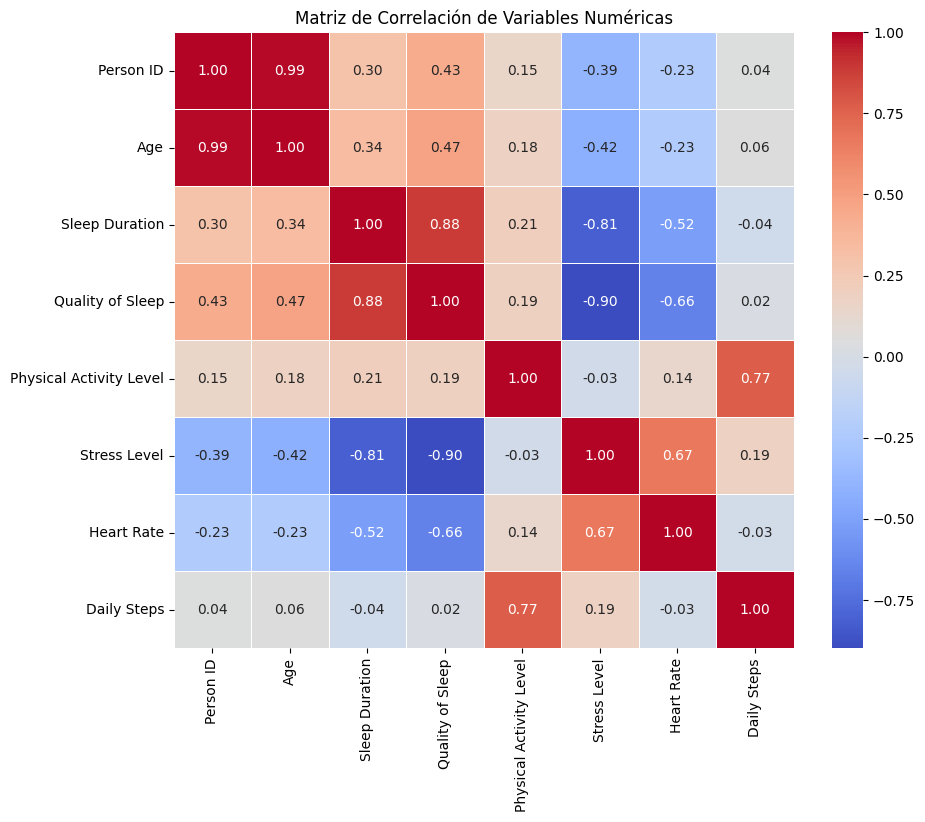

In [73]:

import seaborn as sns
import matplotlib.pyplot as plt


# Seleccionar solo las columnas numéricas
numericas = df.select_dtypes(include=['int64', 'float64'])

# Calcular la matriz de correlación
correlacion = numericas.corr()

# Visualizar la matriz con un mapa de calor
plt.figure(figsize=(10, 8))
sns.heatmap(correlacion, annot=True, cmap='coolwarm', fmt=".2f", linewidths=0.5)
plt.title("Matriz de Correlación de Variables Numéricas")
plt.show()

* quality_of_sleep y sleep_duration, +0.88 , indica una muy fuerte relación positiva. A más horas de sueño, mejor calidad reportada. Ideal para usar una como feature y otra como target.
* quality_of_sleep  y stress_level, -0.90, indica una fuerte correlación negativa. A mayor estrés, peor calidad de sueño. Muy relevante para modelos predictivos.
* stress_level y sleep_duration, -0.81, indica a más estrés, menos sueño. Refuerza el patrón anterior.


In [79]:
df2.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 374 entries, 0 to 373
Data columns (total 15 columns):
 #   Column                   Non-Null Count  Dtype  
---  ------                   --------------  -----  
 0   person_id                374 non-null    int64  
 1   gender                   374 non-null    object 
 2   age                      374 non-null    int64  
 3   occupation               374 non-null    object 
 4   sleep_duration           374 non-null    float64
 5   quality_of_sleep         374 non-null    int64  
 6   physical_activity_level  374 non-null    int64  
 7   stress_level             374 non-null    int64  
 8   bmi_category             374 non-null    object 
 9   blood_pressure           374 non-null    object 
 10  heart_rate               374 non-null    int64  
 11  daily_steps              374 non-null    int64  
 12  sleep_disorder           374 non-null    object 
 13  sleep_category           374 non-null    object 
 14  actividad_fisica         3

# **Recomendaciones para Machine Learning**



# Sugerencias de Targets para ML en Dataset de Sueño y Salud

| Target               | Predicción esperada                                     | Modelo sugerido                          | Desafío principal                                        |
|----------------------|---------------------------------------------------------|-------------------------------------------|----------------------------------------------------------|
| quality_of_sleep     | Puntaje de calidad del sueño (1 a 10)                   | Regresión Lineal, Random Forest Regressor | Escala subjetiva; posible sesgo en autopercepción        |
| sleep_disorder       | Diagnóstico del trastorno (Insomnia, Apnea, NaN)        | Árbol de Decisión, Regresión Logística    | clases desbalanceadas    |
| stress_level         | Nivel de estrés del 1 al 10                             | KNN Regressor, Gradient Boosting Regressor| Alta correlación con otras variables; posible multicolinealidad |
| bmi_category         | Clase de IMC (Normal, Overweight, Obese)                | Random Forest Classifier, SVM Classifier  | Variables de entrada pueden necesitar limpieza/codificación |


In [75]:
df2.columns

Index(['person_id', 'gender', 'age', 'occupation', 'sleep_duration',
       'quality_of_sleep', 'physical_activity_level', 'stress_level',
       'bmi_category', 'blood_pressure', 'heart_rate', 'daily_steps',
       'sleep_disorder', 'sleep_category', 'actividad_fisica'],
      dtype='object')

### Exportar la data limpia

In [81]:
path = "/content/drive/MyDrive/Bootcamp-ML/Cores/core 8/Sleep_health_and_lifestyle_ML.csv"

df2.to_csv(path,index=False)